In [2]:
import cv2
import dlib
import numpy as np

# Load the input image
img = cv2.imread('images/ffhq_3794.png')

# Create the facial landmark detector using dlib's implementation
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('State-Of-The-Art/shape_predictor_68_face_landmarks.dat')


In [76]:
def get_landmarks(img):
    # Detect faces in the image using the detector
    faces = detector(img, 1)

    # For each face in the image, find the landmarks
    for face in faces:
        landmarks = predictor(img, face)
        landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])

        return landmarks

In [77]:
# Store the facial landmarks into a list
all_landmarks = []

In [86]:
# Get the facial landmarks predictions
landmarks = get_landmarks(img)

# Create a binary mask for the facial landmarks
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for x, y in landmarks:
    mask[y, x] = 255

# Concatenate the fourth channel along with the original image data
out_img = np.concatenate((img, mask[:,:,np.newaxis]), axis=2)

# Save the output image with the fourth channel and alpha channel
cv2.imwrite('output_image.png', out_img, [cv2.IMWRITE_PNG_COMPRESSION, 9])

True

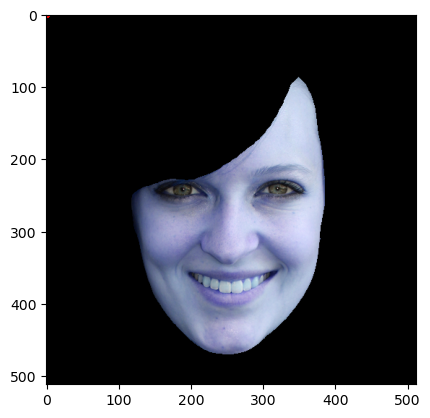

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

img = cv2.imread('images/filtered_img_0.png', cv2.IMREAD_UNCHANGED)

b_channel, g_channel, r_channel, a_channel = cv2.split(img)

rgb = cv2.merge((b_channel, g_channel, r_channel))

plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.scatter(a_channel[:, 0], a_channel[:, 1], s=10, marker='.', c='r')
plt.pause(0.001)  # pause a bit so that plots are updated
plt.figure()

print(a_channel)

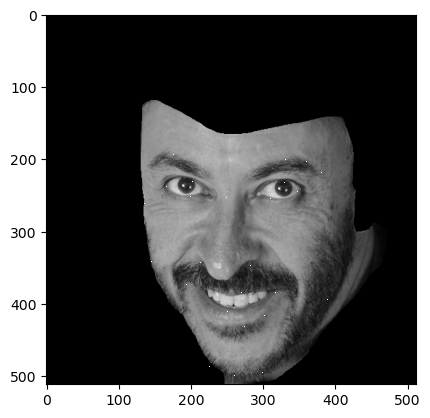

In [3]:
import matplotlib.pyplot as plt

# Load four channel image
img = cv2.imread('images/filtered_img_segmented_GA.png', cv2.IMREAD_UNCHANGED)

# Split four channel image into RGBA channels
r, g, b, a = cv2.split(img)

# Merge RGB channels
rgb = cv2.merge([r, g, b])

# Normalize the alpha channel to be between 0 and 1
a_norm = a / 255.0

# Create a plot to show the four channels with white background
fig, axs = plt.subplots()

# Show the RGB channels
axs.imshow(rgb)

# Show the alpha channel as a gray-scale image with an alpha channel
axs.imshow(a, cmap='gray', alpha=a_norm, interpolation='nearest')

# Display the plot
plt.show()

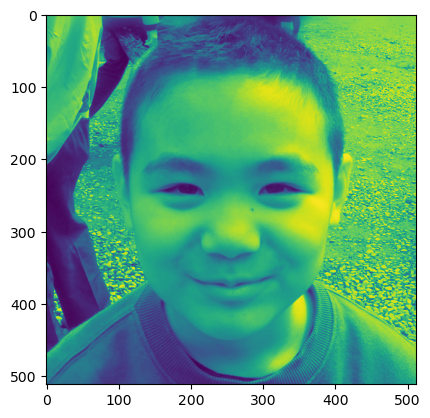

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

red_channel = out_img[:, :, 2]

plt.imshow(red_channel)
plt.pause(0.001)  # pause a bit so that plots are updated
plt.figure()

In [ ]:
# Load the input image with the flag cv2.IMREAD_UNCHANGED
img = cv2.imread('output_image.png', cv2.IMREAD_UNCHANGED)

# Access the fourth channel
fourth_channel = img[:,:,0]

# Print the fourth channel
print(fourth_channel)

[[ 45  43  41 ... 194 194 194]
 [ 41  40  40 ... 194 194 195]
 [ 41  41  41 ... 194 194 195]
 ...
 [ 59  57  45 ...  93  85  93]
 [ 65  49  36 ... 100  97  93]
 [ 53  42  34 ...  88  92  96]]


In [ ]:
# Display the image with the landmarks marked
#cv2.imshow("Facial Landmarks", out_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Pipeline for Dataset RGBA

In [ ]:
import os

In [ ]:
# import libraries
from yoloface import face_analysis
import numpy
import cv2

face=face_analysis()        #  Auto Download a large weight files from Google Drive.
                            #  only first time.
                            #  Automatically  create folder .yoloface on cwd.

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


In [ ]:
# Load the image dataset
dataset_folder = "../datasets/AffectNet_10Percent_div"
classes = os.listdir(dataset_folder)

filtered_dataset_folder = "../datasets/AffectNet_10Percent_Faces"

In [ ]:
# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('State-Of-The-Art/haarcascade_frontalface_default.xml')

In [ ]:
# Define the filter function
def filter_image(img):

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image using the Haar cascade classifier
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        return None

    x, y, w, h = faces[0]

    img = img[y:y+h, x:x+w]

    # Get the facial landmarks predictions
    landmarks = get_landmarks(img)

    # Create a binary mask for the facial landmarks
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    if landmarks is not None:
        for x, y in landmarks:
            if x >= img.shape[0] or y >= img.shape[1]:
                continue
            mask[y, x] = 255
    else:
        return None

    # Concatenate the fourth channel along with the original image data
    filtered_img = np.concatenate((img, mask[:,:,np.newaxis]), axis=2)

    return filtered_img

In [ ]:
# Apply the filter to each image in each class and division
for class_name in classes:
    class_folder = os.path.join(dataset_folder, class_name)
    divisions = os.listdir(class_folder)
    for division_name in divisions:
        division_folder = os.path.join(class_folder, division_name)
        images = []
        if os.path.isdir(division_folder):
            for filename in os.listdir(division_folder):
                img = cv2.imread(os.path.join(division_folder, filename))
                if img is not None:
                    images.append(img)
        
        filtered_images = []
        for img in images:
            filtered_img = filter_image(img)
            if filtered_img is not None:
                filtered_images.append(filtered_img)
        
        # Save the filtered images
        filtered_division_folder = os.path.join(filtered_dataset_folder, class_name, division_name)
        if not os.path.exists(filtered_division_folder):
            os.makedirs(filtered_division_folder)
        for i, filtered_img in enumerate(filtered_images):
            # Save the output image with the fourth channel and alpha channel
            # cv2.imwrite(os.path.join(filtered_division_folder, "filtered_img_{}.jpg".format(i)), filtered_img)
            cv2.imwrite(os.path.join(filtered_division_folder, "filtered_img_{}.png".format(i)), filtered_img, [cv2.IMWRITE_PNG_COMPRESSION, 9])